In [1]:
!conda activate deeplearning

In [2]:
import scipy.io
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [5]:
#import soundfile as sf
#import librosa

import pywt

In [161]:
# load numpy array from csv file
from numpy import loadtxt
from numpy import load
# load array 
data_load_audio_data = loadtxt('data_audio_data3.csv', delimiter=',')
data_load_labels = loadtxt('data_labels3.csv', delimiter=',')

In [162]:
audio_data = np.empty((0, 1024))
labels = np.empty((0, ))
for j in range(data_load_audio_data.shape[0]):
    for i in range(data_load_audio_data.shape[1] // 1024):
        k = i*1024
        audio_data = np.append(audio_data, [data_load_audio_data[j][k:k+1024]], axis = 0)
        labels = np.append(labels, [data_load_labels[j]], axis = 0)

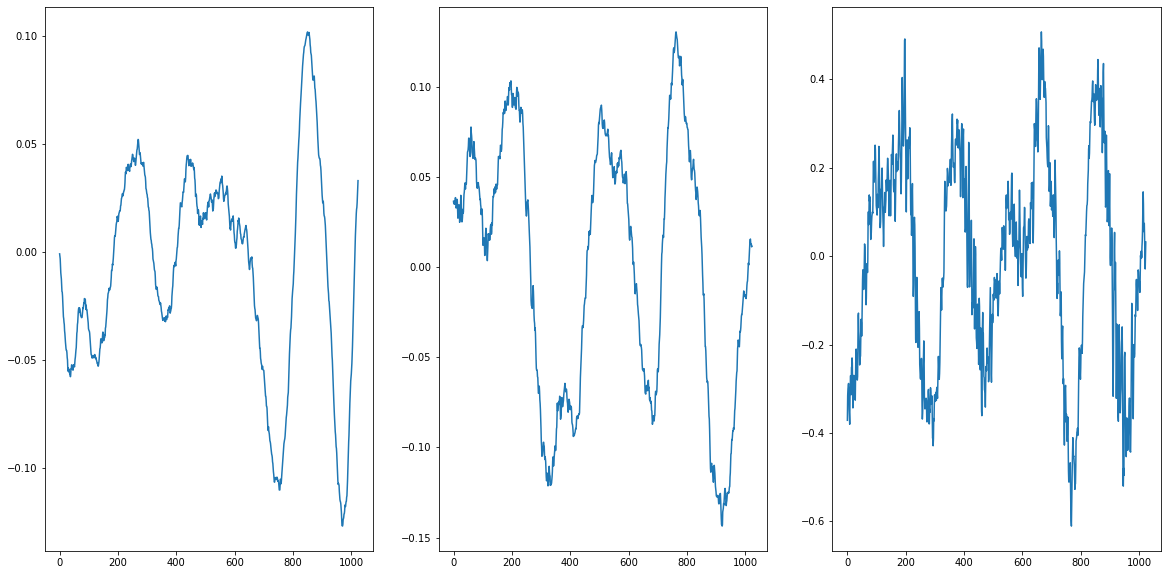

In [163]:
plt.figure(1, figsize=(20,10))
plt.subplot(131)
plt.plot(audio_data[1])
plt.subplot(132)
plt.plot(audio_data[24])
plt.subplot(133)
plt.plot(audio_data[40])

plt.show()

In [164]:
scales = np.arange(1, 501, 1)
coeff1, freqs1 = pywt.cwt(audio_data[1][:1000], scales, 'morl')
coeff2, freqs2 = pywt.cwt(audio_data[24][:1000], scales, 'morl')
coeff3, freqs3 = pywt.cwt(audio_data[40][:1000], scales, 'morl')

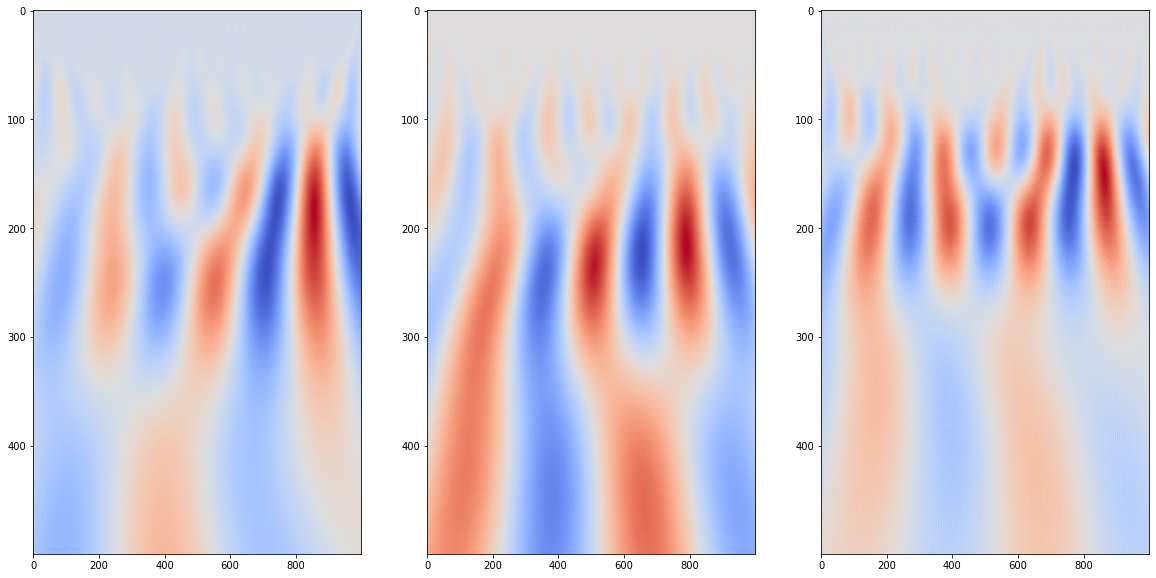

In [165]:
plt.figure(1, figsize=(20,10))
plt.subplot(131)
plt.imshow(coeff1, cmap='coolwarm', aspect='auto')  
plt.subplot(132)
plt.imshow(coeff2, cmap='coolwarm', aspect='auto')  
plt.subplot(133)
plt.imshow(coeff3, cmap='coolwarm', aspect='auto') 

plt.show() 

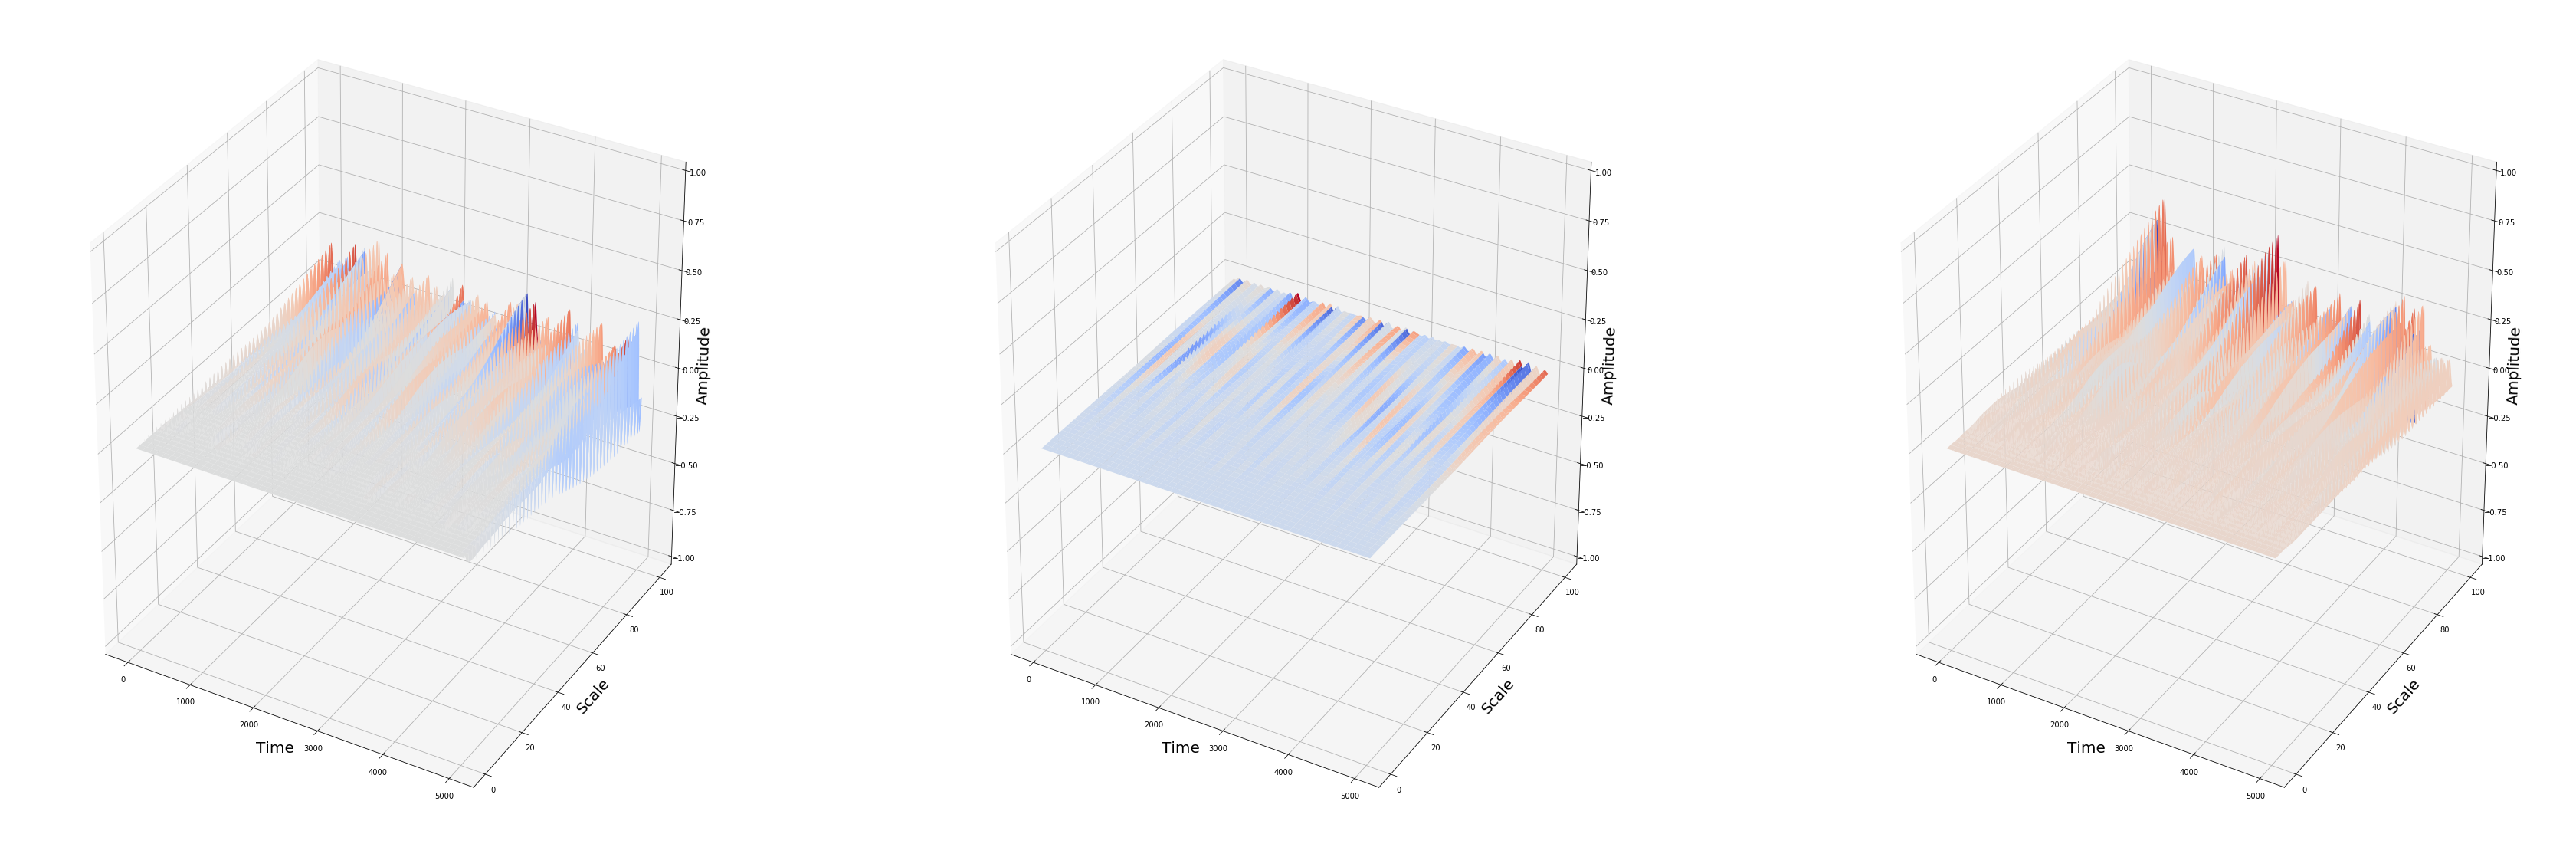

In [56]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(60,20))

ax1 = fig.add_subplot(1, 3, 1, projection='3d')

Y = np.arange(1, 101, 1)
X = np.arange(1, 5001, 1)

X, Y = np.meshgrid(X, Y)

ax1.plot_surface(X, Y, coeff1, cmap=cm.coolwarm, linewidth=0, antialiased=True)

ax1.set_xlabel("Time", fontsize=20)
ax1.set_ylabel("Scale", fontsize=20)
ax1.set_zlabel("Amplitude", fontsize=20)
ax1.set_zlim3d(-1,1)

ax2 = fig.add_subplot(1, 3, 2, projection='3d')

ax2.plot_surface(X, Y, coeff2, cmap=cm.coolwarm, linewidth=0, antialiased=True)


ax2.set_xlabel("Time", fontsize=20)
ax2.set_ylabel("Scale", fontsize=20)
ax2.set_zlabel("Amplitude", fontsize=20)
ax2.set_zlim3d(-1,1)

ax3= fig.add_subplot(1, 3, 3, projection='3d')

ax3.plot_surface(X, Y, coeff3, cmap=cm.coolwarm, linewidth=0, antialiased=True)


ax3.set_xlabel("Time", fontsize=20)
ax3.set_ylabel("Scale", fontsize=20)
ax3.set_zlabel("Amplitude", fontsize=20)
ax3.set_zlim3d(-1,1)

plt.show()

In [166]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

features = np.empty((0,1000))

for ind in range(len(audio_data)):
    print('.', end='')
    coeff, freqs = pywt.cwt(audio_data[ind][:1000], scales, 'morl')    
    features = np.vstack([features, pca.fit_transform(coeff).flatten()])

..................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [167]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=7)

In [168]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [169]:
y_pred = clf.predict(X_test)
print("Accuracy : %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

Accuracy : 90.00%


In [158]:
y_train

array([2., 3., 3., 2., 2., 3., 2., 3., 1., 1., 2., 2., 2., 2., 3., 2., 1.,
       2., 3., 1., 3., 3., 1., 1., 1., 3., 3., 2., 3., 1., 3., 2., 2., 3.,
       2., 2., 1., 2., 1., 3.])

In [159]:
y_pred

array([2., 2., 2., 2., 2., 2., 1., 2., 1., 2.])

#### проверка

In [17]:
test_data = []
GAZEL_data = df[1][22]
BTR_data = df[1][10]
BMP_data = df[1][3]
k_1 = len(GAZEL_data)//2
k_2 = len(BTR_data)//2
k_3 = len(BMP_data)//2
test_data = [GAZEL_data[k_1:k_1+10000], BTR_data[k_3-10000:k_3], BMP_data[k_3-10000:k_3]]
y_true = np.array([3,2,1])

NameError: name 'df' is not defined

In [ ]:
def to_mono(data):
    if data.ndim > 1:
        data = np.mean(data, axis=1)
    return data

for index in range(len(test_data)):
    test_data[index] = to_mono(test_data[index])

In [ ]:
featurest = np.empty((0,1000))

for ind in range(len(test_data)):
    print('.', end='')
    coefft, freqst = pywt.cwt(test_data[ind][:10000], scales, 'morl')    
    featurest = np.vstack([featurest, pca.fit_transform(coefft).flatten()])

In [ ]:
y_pr = clf.predict(featurest)
print("Accuracy : %.2f%%" % (accuracy_score(y_true, y_pr) * 100))

In [171]:
#o_data = loadtxt('data_audio_data3.csv', delimiter=',')
features.shape

(450, 1000)

In [ ]:
data_fr = loadtxt('data_freqs.csv', delimiter=',')
data_fr

In [170]:
from numpy import savetxt

# save to csv file
savetxt('data_features_1000x1000.csv', features)